# Predicting House Prices Using Decision Tree

## Import and Data Cleaning

In [4]:
import pandas as pd
file = '/Users/rifqyadiyatma/Downloads/melb_data.csv'

df = pd.read_csv(file)
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [5]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [22]:
#Drop missing value

df = df.dropna(axis = 0)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


## Assign Target and Feature for Prediction

In [23]:
#Choosing target to predict

y = df.Price

#Features that will be used in predicting model

melbourne_feature = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

X = df[melbourne_feature]

In [24]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [25]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


In [12]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 933.3 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 483.0 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 648.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 409.6 kB/s eta 0:00:0000:0100:03
Note: you may need to restart the kernel to use updated packages.


## Model Prediction Using Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor

#Define a model, random_tate = 1 to ensure same results each run
model = DecisionTreeRegressor(random_state = 1)

#Fit model to use for the prediction
model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [27]:
#Test prediction for the first 5 houses
print('First 5 houses:')
print(X.head())

#The prie predictio based on the first 5 houses
print('Price prediction')
print(model.predict(X.head()))

#Actual price from y
print('Actual price:')
print(y.head())

First 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
Price prediction
[1035000. 1465000. 1600000. 1876000. 1636000.]
Actual price:
1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64


## Validating prediction model with MAE metrics

In [28]:
#Validating prediction model with MAE metrics

from sklearn.metrics import mean_absolute_error

model_predicted = model.predict(X)

mean_absolute_error(y, model_predicted)

1115.7467183128902

This method is not good because we only validating the samples. once the model predicted a new data, it will have bias. 

So, we could use sklearn train test split for splitting into data for training and for validation

## Split into traing and validation data

In [29]:
from sklearn.model_selection import train_test_split

#Split data into training and validation data, we could enter how many data that will be split
#If not inputting how many data that going to be split, it would be random split
#Inputting random_state would give the same split everytime the code runs
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

#Define model
new_model = DecisionTreeRegressor()
#Fit model into train data
new_model.fit(train_X, train_y)

#predicting validation data
validation_data = new_model.predict(val_X)

#Calculate the accuracy using MAE metrics
print(mean_absolute_error(val_y, validation_data))

254426.48160103292


As we can see the the error went from 1115 to 254245 after we split data into training and validation

Based on this result, our model is unusable because of high result of MAE.

## Overfitting and Underfitting

When we divide the houses amongst many leaves, we also have fewer houses in each leaf. Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses).

This is a phenomenon called overfitting, where a model matches the training data almost perfectly, but does poorly in validation and other new data. On the flip side, if we make our tree very shallow, it doesn't divide up the houses into very distinct groups.

At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called underfitting.

Source: Kaggle

By avoiding overfitting and underfitting, we could increase model accuracy.

To do that, we increase the number of splits in leaves. by using the max_leaf_nodes argumen, it provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

In [33]:
#Build a function to find the sweet spot between overfitting and underfitting
def get_mae(max_leaves, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes = max_leaves, random_state = 0)
    model.fit(train_X, train_y)
    pred_validation = model.predict(val_X)
    mae = mean_absolute_error(val_y, pred_validation)
    return mae


Using for loops to compare accuracy with different values of max_leaves

In [37]:
for max_leaves in [6, 60, 600, 6000]:
    mae = get_mae(max_leaves, train_X, val_X, train_y, val_y)
    print('Number of leaves: %d \t\t  Mean Absolute Error: %d' %(max_leaves, mae))

Number of leaves: 6 		  Mean Absolute Error: 352352
Number of leaves: 60 		  Mean Absolute Error: 263628
Number of leaves: 600 		  Mean Absolute Error: 244916
Number of leaves: 6000 		  Mean Absolute Error: 256227


Based on the output, we could see 600 is the optimal number of leaves.

In [72]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
#loop to find the ideal tree size from candidate_max_leaf_nodes
max_leaves = {max_leaves: get_mae(max_leaves, train_X, val_X, train_y, val_y) for 
       max_leaves in candidate_max_leaf_nodes}

# Store the best value of max_leaf_nodes
best_tree_size = min(max_leaves, key = max_leaves.get)

print(best_tree_size)

250


In [71]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
#loop to find the ideal tree size from candidate_max_leaf_nodes
values = [get_mae(max_leaves, train_X, val_X, train_y, val_y) for 
       max_leaves in candidate_max_leaf_nodes]

# Store the best value of max_leaf_nodes
best_value = min(values)

print(best_value)

240719.92550287693


In [74]:
test_model = DecisionTreeRegressor(max_leaf_nodes = best_tree_size, random_state = 0)

test_model.fit(train_X, train_y)

pred = test_model.predict(val_X)

decMAE = mean_absolute_error(val_y, pred)

print(decMAE)

240719.92550287693


based on model result above, proves that using a suitable tree size can produce better accuracy results than the model before

## Improving Accuracy with Random Forest

The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters. If you keep modeling, you can learn more models with even better performance, but many of those are sensitive to getting the right parameters.

In [63]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(random_state = 1)

randomForest.fit(train_X, train_y)

predVal = randomForest.predict(val_X)

mae = mean_absolute_error(predVal, val_y)

print(mae)

190414.59149025998


Price predictions using Random Forests have better results than using Decision Tree.

The MAE results shows that random forest could increase model accuracy.

Where Decision Tree have MAE result of 240719.92550287693 and Random Forest have MAE result of 190414.59149025998.

It is a 500+ difference between Random Forest and Decision Tree

## Visualisation 

In [51]:
import matplotlib.pyplot as plt 

### Decision Tree

Text(0, 0.5, 'Actual Price')

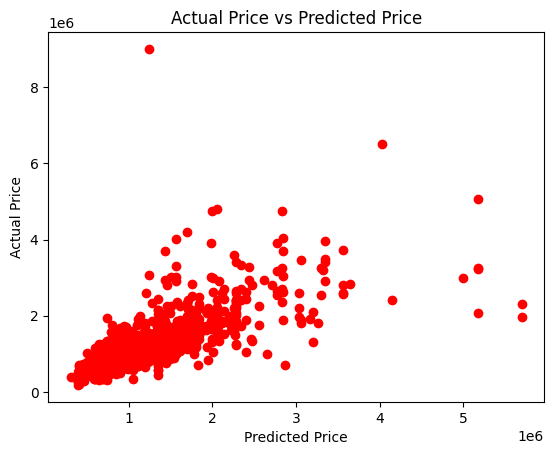

In [68]:
plt.scatter(pred, val_y, c = 'r')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

### Random Forest

Text(0, 0.5, 'Actual Price')

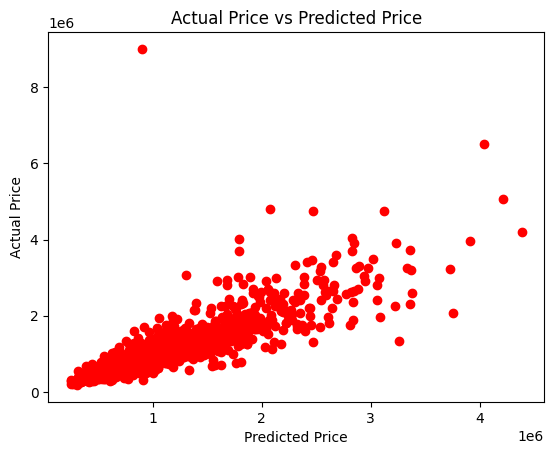

In [70]:
plt.scatter(predVal, val_y, c = 'r')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

Based on these Scatterplot, Random Forest model have a slightly better correlation than Decision Tree model 